In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load the Dataset

In [4]:
import pandas as pd
import numpy as np

Create DataFrame as df ( Created by Pandas )

In [5]:
## Load the datasets

df_train = pd.read_csv('/content/drive/MyDrive/emotions-dataset-razan-nlp-new/train.txt', sep=';', header=None)
df_valid = pd.read_csv('/content/drive/MyDrive/emotions-dataset-razan-nlp-new/val.txt', sep=';', header=None)
df_test = pd.read_csv('/content/drive/MyDrive/emotions-dataset-razan-nlp-new/test.txt', sep=';', header=None)

df_train.columns = ['text', 'emotion']
df_valid.columns = ['text', 'emotion']
df_test.columns = ['text', 'emotion']

## Combine all dataset in one DF
df = pd.concat((df_train, df_valid, df_test), axis=0)

dataset = df[['emotion', 'text']]
dataset

,emotion,text
0,sadness,i didnt feel humiliated
1,sadness,i can go from feeling so hopeless to so damned...
2,anger,im grabbing a minute to post i feel greedy wrong
3,love,i am ever feeling nostalgic about the fireplac...
4,anger,i am feeling grouchy
...,...,...
1995,anger,i just keep feeling like someone is being unki...
1996,anger,im feeling a little cranky negative after this...
1997,joy,i feel that i am useful to my people and that ...
1998,joy,im feeling more comfortable with derby i feel ...


# Pre - Processing

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
print('The Shape of the Dataset is: ', df.shape)

The Shape of the Dataset is:  (20000, 2)


In [8]:
## Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     20000 non-null  object
 1   emotion  20000 non-null  object
dtypes: object(2)
memory usage: 468.8+ KB


##### look for null falues

In [9]:
df.isna().sum()

text       0
emotion    0
dtype: int64

##### Look for duplicate values

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 20000, dtype: bool

In [11]:
## Check the Traget values
df['emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [12]:
## Distribution of target
df['emotion'].value_counts()  ## imblanced dataset

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: emotion, dtype: int64

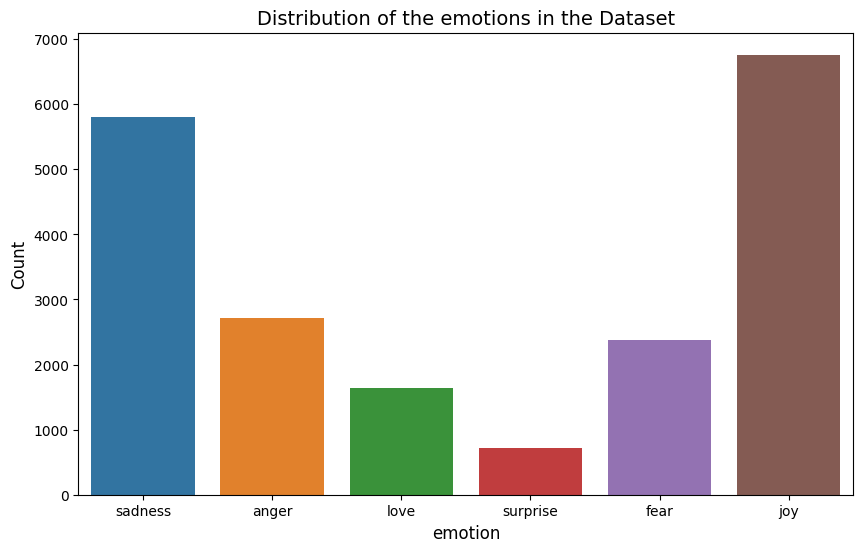

In [13]:
## countplot of target
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='emotion')
plt.title('Distribution of the emotions in the Dataset', fontsize=14, c='k')
plt.xlabel('emotion', c='k', fontsize=12)
plt.ylabel('Count', c='k', fontsize=12)
plt.show()

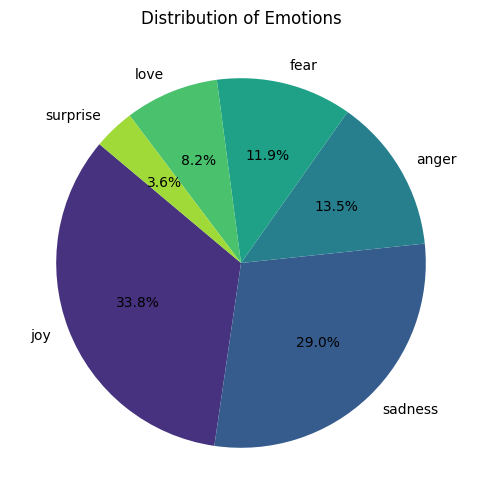

In [14]:
# A piechart for understanding the proportion
plt.figure(figsize=(6, 6))
plt.pie(df['emotion'].value_counts().values, labels=df['emotion'].value_counts().index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('viridis', len(df['emotion'].value_counts().index)))
plt.title('Distribution of Emotions')
plt.show()

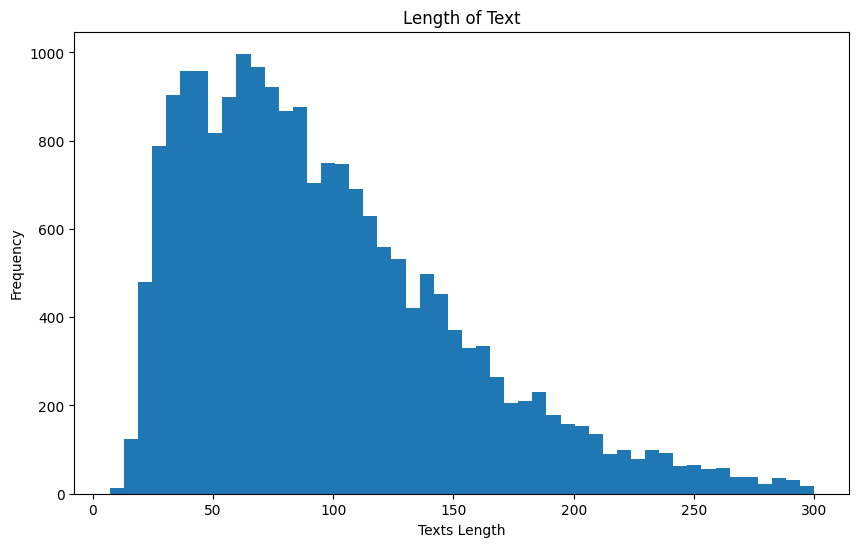

In [15]:
## Check Length
length_text = dataset['text'].str.len()
## Plotting
plt.figure(figsize=(10, 6))
plt.hist(length_text, bins=50)
plt.title('Length of Text')
plt.xlabel('Texts Length')
plt.ylabel('Frequency')
plt.show()

## Text cleaning

#### Removing stopwords

In [16]:
import re

In [17]:
def remove_numeric(texts):
    nums = re.compile(r"\d")
    return nums.sub(r"",texts)

def remove_punct(texts):
    table = str.maketrans("","",string.punctuation)
    return texts.translate(table)

def remove_stopwords(texts):
    stop = stopwords.words("english")

    texts = [word.lower() for word in  texts.split(" ") if word not in stop]
    return  " ".join(texts)

In [18]:
# changing the data type to the category to encode into codes
df['emotion'] = df.emotion.astype('category')

In [19]:
df.emotion

0       sadness
1       sadness
2         anger
3          love
4         anger
         ...   
1995      anger
1996      anger
1997        joy
1998        joy
1999       fear
Name: emotion, Length: 20000, dtype: category
Categories (6, object): ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

In [20]:
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()
lbl_enc.fit(df['emotion'])

## Transform
df['emotion'] = lbl_enc.transform(df['emotion'])

In [21]:
df

,text,emotion
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0
...,...,...
1995,i just keep feeling like someone is being unki...,0
1996,im feeling a little cranky negative after this...,0
1997,i feel that i am useful to my people and that ...,2
1998,im feeling more comfortable with derby i feel ...,2


In [22]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['emotion']

## Split firstly to train-full and test.
## Shuffling is false to not shuffle -> As we concat the 3 DF below each other in the begining of the notebook
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=False)

## Split again to train and valid
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42, shuffle=False)

In [23]:
X_train.shape, y_train.shape

((16200,), (16200,))

In [24]:
X_valid.shape, y_valid.shape

((1800,), (1800,))

In [25]:
X_test.shape, y_test.shape

((2000,), (2000,))

# Normalization

In [26]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [27]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk import word_tokenize
from nltk import PorterStemmer, WordNetLemmatizer
from keras.preprocessing.text import Tokenizer

### Tokenization

In [28]:
tokenizer = Tokenizer(num_words=5000)

tweet = dataset.text.values
tokenizer.fit_on_texts(tweet)

In [29]:
## Tokenization
tokenized_tweet = dataset['text'].apply(lambda x: x.split())
tokenized_tweet.head()

0                         [i, didnt, feel, humiliated]
1    [i, can, go, from, feeling, so, hopeless, to, ...
2    [im, grabbing, a, minute, to, post, i, feel, g...
3    [i, am, ever, feeling, nostalgic, about, the, ...
4                            [i, am, feeling, grouchy]
Name: text, dtype: object

In [30]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

17097


## Stemming

In [31]:
from nltk.stem import PorterStemmer

def stemming(texts):
    stemmer = PorterStemmer()
    stemmed = []
    for word in texts.split():
        stemmed.append(stemmer.stem(word))
    return " ".join(stemmed)

X_train = X_train.map(stemming)
X_test = X_test.map(stemming)

In [32]:
## Stemming
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0                             [i, didnt, feel, humili]
1    [i, can, go, from, feel, so, hopeless, to, so,...
2    [im, grab, a, minut, to, post, i, feel, greedi...
3    [i, am, ever, feel, nostalg, about, the, firep...
4                               [i, am, feel, grouchi]
Name: text, dtype: object

## Lemmatization

In [33]:
## Lemmatization
lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head()

0                             [i, didnt, feel, humili]
1    [i, can, go, from, feel, so, hopeless, to, so,...
2    [im, grab, a, minut, to, post, i, feel, greedi...
3    [i, am, ever, feel, nostalg, about, the, firep...
4                               [i, am, feel, grouchi]
Name: text, dtype: object

In [34]:
from keras.preprocessing.sequence import pad_sequences
X_train = tokenizer.texts_to_sequences(X_train) # this converts texts into some numeric sequences
X_train_pad = pad_sequences(X_train, maxlen=300, padding='post') # this makes the length of all numeric sequences equal

X_valid = tokenizer.texts_to_sequences(X_valid)
X_valid_pad = pad_sequences(X_valid, maxlen = 300, padding = 'post')

X_test = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test, maxlen = 300, padding = 'post')

In [35]:
X_train_pad.shape, y_train.shape

((16200, 300), (16200,))

In [36]:
X_valid_pad.shape, y_valid.shape

((1800, 300), (1800,))

In [37]:
X_test_pad.shape, y_test.shape

((2000, 300), (2000,))

# Word2vec

In [38]:
#pip install gensim
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-100') #100 dimension

[==================================================] 100.0% 128.1/128.1MB downloaded


In [39]:
vector_size = 100
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape
for word, index in tokenizer.word_index.items():
    if index < num_words: # since index starts with zero
        if word in glove_gensim.key_to_index:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(100)

# Modeling & Evaluation

In [40]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Bidirectional
from tensorflow.keras.models import Sequential

In [41]:
# Assuming other constants and variables are defined
EMBEDDING_DIM = 100
class_num = 6

model = Sequential()
model.add(Embedding(input_dim=num_words,
                    output_dim=EMBEDDING_DIM,
                    input_length=X_train_pad.shape[1],
                    weights=[gensim_weight_matrix],
                    trainable=False))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(200, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dense(class_num, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1709700   
                                                                 
 dropout (Dropout)           (None, 300, 100)          0         
                                                                 
 bidirectional (Bidirection  (None, 300, 200)          160800    
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 300, 200)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 300, 400)          641600    
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 300, 400)          0

In [42]:
#EarlyStopping and ModelCheckpoint
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [43]:
X_test_pad.shape, y_test.shape

((2000, 300), (2000,))

In [44]:
history_embedding = model.fit(X_train_pad, y_train,
                                epochs = 25, batch_size = 64,
                                validation_data=(X_valid_pad, y_valid),
                                verbose = 1, callbacks= [es, mc])

Epoch 1/25
254/254 [==============================] - ETA: 0s - loss: 1.5425 - accuracy: 0.3797
Epoch 1: val_accuracy improved from -inf to 0.50889, saving model to ./model.h5
254/254 [==============================] - 41s 117ms/step - loss: 1.5425 - accuracy: 0.3797 - val_loss: 1.3660 - val_accuracy: 0.5089
Epoch 2/25
  1/254 [..............................] - ETA: 24s - loss: 1.4497 - accuracy: 0.4531

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


254/254 [==============================] - ETA: 0s - loss: 1.4039 - accuracy: 0.4543
Epoch 2: val_accuracy improved from 0.50889 to 0.59889, saving model to ./model.h5
254/254 [==============================] - 27s 107ms/step - loss: 1.4039 - accuracy: 0.4543 - val_loss: 1.1602 - val_accuracy: 0.5989
Epoch 3/25
254/254 [==============================] - ETA: 0s - loss: 1.2767 - accuracy: 0.5080
Epoch 3: val_accuracy improved from 0.59889 to 0.63944, saving model to ./model.h5
254/254 [==============================] - 27s 107ms/step - loss: 1.2767 - accuracy: 0.5080 - val_loss: 1.1513 - val_accuracy: 0.6394
Epoch 4/25
254/254 [==============================] - ETA: 0s - loss: 1.1937 - accuracy: 0.5495
Epoch 4: val_accuracy improved from 0.63944 to 0.68611, saving model to ./model.h5
254/254 [==============================] - 28s 109ms/step - loss: 1.1937 - accuracy: 0.5495 - val_loss: 0.9870 - val_accuracy: 0.6861
Epoch 5/25
254/254 [==============================] - ETA: 0s - loss: 1.

In [45]:
from sklearn.metrics import classification_report

In [46]:
## Finally, evaluate on test dataset
y_pred_test = np.argmax(model.predict(X_test_pad), axis=-1)
print(classification_report(y_pred_test, y_test))

63/63 [==============================] - 4s 29ms/step
              precision    recall  f1-score   support

           0       0.47      0.63      0.53       204
           1       0.45      0.46      0.45       219
           2       0.70      0.66      0.68       737
           3       0.50      0.57      0.53       141
           4       0.68      0.57      0.62       690
           5       0.08      0.56      0.13         9

    accuracy                           0.60      2000
   macro avg       0.48      0.57      0.49      2000
weighted avg       0.63      0.60      0.61      2000



In [47]:
## inference on new sample
new_samples = ['feel weird when have meet peopl text like dont talk face face',
              'feel that use peopl that give great feel achiev']


## Tokenize and pad the new samples
X_new_samples = tokenizer.texts_to_sequences(new_samples)
X_new_samples_pad = pad_sequences(X_new_samples, maxlen=300, padding='post')


# Predict probabilities for each class
pred_probs = model.predict(X_new_samples_pad)
pred_labels = pred_probs.argmax(axis=-1)

## Finally, Inverse transform using LabelEncoder
pred_labels = lbl_enc.inverse_transform(pred_labels)
pred_labels

1/1 [==============================] - 0s 56ms/step


array(['fear', 'joy'], dtype=object)